# 120.LeNet-5 (1998, Yan LeCunn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation

from tensorflow.keras.datasets import mnist
np.random.seed(101)

### train, test split

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### scaling 
- 0 `~` 1 사이로 pixel 값을 scale

In [3]:
X_train_scaled = X_train / 255.
X_test_scaled = X_test / 255.

### Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [4]:
X_train_scaled = np.expand_dims(X_train_scaled, axis=3)
X_test_scaled = np.expand_dims(X_test_scaled, axis=3)

In [5]:
X_train_scaled.shape
X_test_scaled.shape

(10000, 28, 28, 1)

### label 을 one-hot-encoding

In [6]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

## tf.data 를 이용한 shuffling and batch 구성

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_onehot)).shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_onehot)).batch(128)

## LeNet 구성

<img src="https://d2l.ai/_images/lenet.svg" width="800" />

In [8]:
# LeNet
model = tf.keras.Sequential()

model.add(Conv2D(6, kernel_size=5, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(16, kernel_size=5, padding="valid"))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

In [10]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 10s 21ms/step - loss: 0.3731 - accuracy: 0.8908 - val_loss: 0.1174 - val_accuracy: 0.9632
Epoch 2/5
469/469 [==============================] - 9s 20ms/step - loss: 0.1084 - accuracy: 0.9672 - val_loss: 0.0730 - val_accuracy: 0.9770
Epoch 3/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0531 - val_accuracy: 0.9816
Epoch 4/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0485 - val_accuracy: 0.9833
Epoch 5/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0462 - val_accuracy: 0.9848


In [12]:
score = model.evaluate(test_ds, verbose=0)

In [13]:
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

Test Score  0.0462302602827549
Test Accuracy  0.9847999811172485


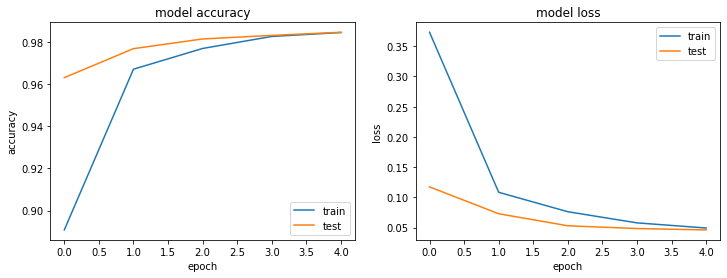

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

In [15]:
y_pred = model.predict_classes(X_test_scaled)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [16]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))

[[ 973    0    0    0    0    0    4    1    2    0]
 [   0 1124    2    1    0    1    2    1    4    0]
 [   2    0 1023    0    1    0    0    3    3    0]
 [   1    0    2  987    0    7    0    7    4    2]
 [   0    0    0    0  977    0    5    0    0    0]
 [   2    0    0    3    0  882    2    1    2    0]
 [   7    3    0    0    1    1  945    0    1    0]
 [   1    1    5    0    1    0    0 1017    1    2]
 [   7    0    3    0    3    0    1    3  954    3]
 [   3    2    2    0   21    2    0   12    1  966]]


Test Accuracy : 0.9848


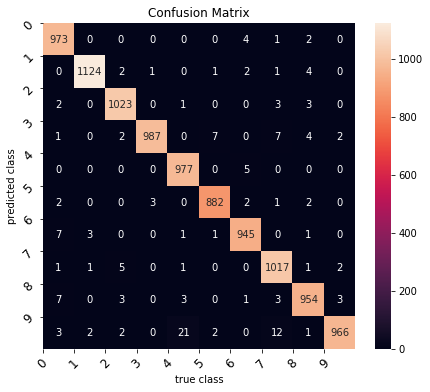

In [18]:
import seaborn as sns

plt.figure(figsize=(7,6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

plt.xticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.yticks(np.arange(10), list(range(10)), rotation=45, fontsize=12)
plt.xlabel("true class")
plt.ylabel("predicted class")
plt.title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(y_test, y_pred))

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

np.random.seed(102)

In [20]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

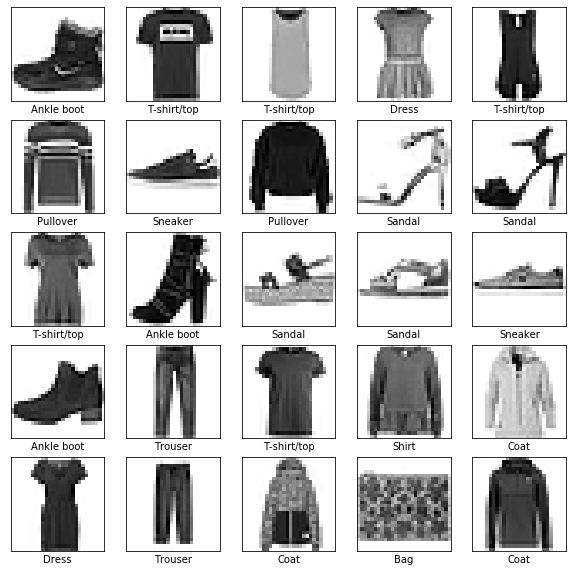

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

In [24]:
X_train = train_images / 255.0
X_test  = test_images / 255.0

In [25]:
# Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가

In [26]:
# label 을 one-hot-encoding

In [27]:
# tf.data 를 이용한 shuffling and batch 구성

In [28]:
# LeNet model 구성

In [29]:
# model compile and predict

In [30]:
# train history 시각화

In [31]:
# confusion matrix 시각화